# Chapter 6 (continuation) - Linear Regression and Hypothesis

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from math import sqrt
from scipy import stats
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

#### Data

In [4]:
# Data: https://figshare.com/articles/dataset/GLA_World_Cities_2016/14657391/1?file=28139343

gla_cities = pd.read_csv('GLA_World_Cities_2016.csv')

gla_cities.head()

,City,Country,Population,Inland area in km2,Density in people per hectare,Dwellings,Density in dwellings per hectare,People per dwelling,Approx city radius km,Main topographical constraint,Constraint
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Greater London,England,"8,663,300","1,572",55.0,"3,454,490",22.0,2.5,23.0,Rivers,4%
2,Inner London,England,"3,439,700",319,108.0,"1,460,840",46.0,2.4,10.0,Rivers,5%
3,Outer London,England,"5,223,500","1,254",42.0,"1,993,660",16.0,2.6,NaN,NaN,NaN
4,Paris,France,"2,229,621",105,212.0,"1,336,209",127.0,1.7,8.0,Rivers,2%


In [5]:
# How many NaN are in each column?
gla_cities.isna().sum()

City                                1
Country                             1
Population                          1
Inland area in km2                  1
Density in people per hectare       1
Dwellings                           1
Density in dwellings per hectare    1
People per dwelling                 1
Approx city radius km               2
Main topographical constraint       2
Constraint                          2
dtype: int64

In [6]:
# Calculate the percentage of NA values for each column
na_percentage = gla_cities.isna().mean() * 100

# Display the result
print('Percentage of NA values for each column:\n\n',na_percentage.round(2))

Percentage of NA values for each column:

 City                                 5.56
Country                              5.56
Population                           5.56
Inland area in km2                   5.56
Density in people per hectare        5.56
Dwellings                            5.56
Density in dwellings per hectare     5.56
People per dwelling                  5.56
Approx city radius km               11.11
Main topographical constraint       11.11
Constraint                          11.11
dtype: float64


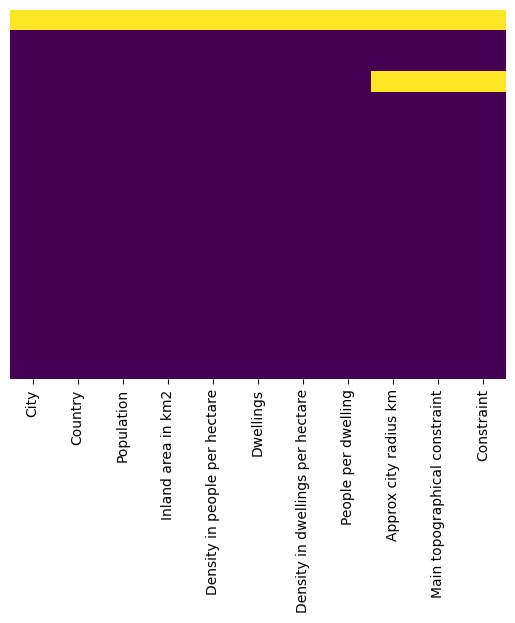

In [7]:
# Heatmap for visualize the missing data
sns.heatmap(gla_cities.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [8]:
# Drop rows with any NA values
cities = gla_cities.dropna()

# How many NaN now
cities.isna().sum()

City                                0
Country                             0
Population                          0
Inland area in km2                  0
Density in people per hectare       0
Dwellings                           0
Density in dwellings per hectare    0
People per dwelling                 0
Approx city radius km               0
Main topographical constraint       0
Constraint                          0
dtype: int64

In [9]:
cities.head()

,City,Country,Population,Inland area in km2,Density in people per hectare,Dwellings,Density in dwellings per hectare,People per dwelling,Approx city radius km,Main topographical constraint,Constraint
1,Greater London,England,"8,663,300","1,572",55.0,"3,454,490",22.0,2.5,23.0,Rivers,4%
2,Inner London,England,"3,439,700",319,108.0,"1,460,840",46.0,2.4,10.0,Rivers,5%
4,Paris,France,"2,229,621",105,212.0,"1,336,209",127.0,1.7,8.0,Rivers,2%
5,Lyon,France,"500,715",48,105.0,"265,599",55.0,1.9,7.0,Rivers,5%
6,Berlin,Germany,"3,469,849",892,39.0,"1,892,000",21.0,1.8,16.0,Rivers,6%


In [10]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 1 to 17
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   City                              16 non-null     object 
 1   Country                           16 non-null     object 
 2   Population                        16 non-null     object 
 3   Inland area in km2                16 non-null     object 
 4   Density in people per hectare     16 non-null     float64
 5   Dwellings                         16 non-null     object 
 6   Density in dwellings per hectare  16 non-null     float64
 7   People per dwelling               16 non-null     float64
 8   Approx city radius km             16 non-null     float64
 9   Main topographical constraint     16 non-null     object 
 10  Constraint                        16 non-null     object 
dtypes: float64(4), object(7)
memory usage: 1.5+ KB


In [11]:
cities

,City,Country,Population,Inland area in km2,Density in people per hectare,Dwellings,Density in dwellings per hectare,People per dwelling,Approx city radius km,Main topographical constraint,Constraint
1,Greater London,England,"8,663,300","1,572",55.0,"3,454,490",22.0,2.5,23.0,Rivers,4%
2,Inner London,England,"3,439,700",319,108.0,"1,460,840",46.0,2.4,10.0,Rivers,5%
4,Paris,France,"2,229,621",105,212.0,"1,336,209",127.0,1.7,8.0,Rivers,2%
5,Lyon,France,"500,715",48,105.0,"265,599",55.0,1.9,7.0,Rivers,5%
6,Berlin,Germany,"3,469,849",892,39.0,"1,892,000",21.0,1.8,16.0,Rivers,6%
7,Madrid (City),Spain,"3,141,991",606,52.0,"1,320,531",22.0,2.4,13.0,Mountains,12%
8,Barcelona,Spain,"1,604,555",98,163.0,"684,078",70.0,2.3,6.0,Coast and mountains,75%
9,Sevilla,Spain,"693,878",141,49.0,"268,435",19.0,2.6,7.0,Rivers,3%
10,New York (City),United States,"8,491,079",784,108.0,"3,371,062",43.0,2.5,14.0,Coast and rivers,40%
11,Chicago,United States,"2,722,389",590,46.0,"1,194,337",20.0,2.3,13.0,Lake,45%


In [12]:
# Ensure Population and Dwellings are numeric in a new DataFrame copy

cita = cities.copy()

cita['Population'] = pd.to_numeric(
    cita['Population'].str.replace(',', '', regex=True), errors='coerce'
)

cita['Dwellings'] = pd.to_numeric(
    cita['Dwellings'].str.replace(',', '', regex=True), errors='coerce'
)

# Verify the conversion
print(cita.dtypes)

City                                 object
Country                              object
Population                            int64
Inland area in km2                   object
Density in people per hectare       float64
Dwellings                             int64
Density in dwellings per hectare    float64
People per dwelling                 float64
Approx city radius km               float64
Main topographical constraint        object
Constraint                           object
dtype: object


# Pearson Correlation

    • H0: The correlation between the variables is zero, i.e. r = 0
    • Ha: The correlation between the variables is not zero, e.g. r = 1

In [15]:
from scipy.stats import pearsonr

# Perform Pearson correlation
r, p_value = stats.pearsonr(cita['Population'], cita['Approx city radius km'])
print(f"Pearson correlation coefficient: {r:.4f}")
print(f"P-value: {p_value:.8f}")

Pearson correlation coefficient: 0.7914
P-value: 0.00026025


Pearson Correlation Coefficient (r):

    r = 0.7914: This indicates a strong positive correlation between the population size and the approximate city radius.
    
    As the population increases, the city radius also tends to increase.

P-value:

    p = 0.0003: This is significantly smaller than a typical threshold (α=0.05).
    
    The correlation is statistically significant. This means there is strong evidence that the observed relationship between population and city radius is not due to random chance.

In [17]:
n = cita.shape[0]  # Get the number of rows (observations) in the cities DataFrame

rho = r              # Assign the Pearson correlation coefficient (calculated earlier: 0.7913877430390618) to rho 
                     
# Calculate the t-score for the correlation using the t-distribution formula
tscore = rho * np.sqrt(n - 2) / np.sqrt(1 - rho**2)

print(tscore)

4.843827042161195


In [18]:
from scipy.stats import t

# Calculate the one-tailed p-value using the t-distribution cumulative density function
p1t = 1 - t.cdf(tscore, n - 2)  # Probability of observing a t-score greater than the calculated value

# Calculate the two-tailed p-value by doubling the one-tailed p-value
p2t = 2 * p1t                   # Reflects the probability for both tails in a two-tailed test

# Print the two-tailed p-value
print(p2t.round(8))                      # Displays the significance of the observed correlation

0.00026025


In [19]:
# Alternative way: Calculate the two-tailed p-value directly using the t-distribution survival function (sf)
p2t = 2 * t.sf(tscore, n - 2)  # Survival function provides the upper tail probability; multiplied by 2 for two-tailed test

# Print the two-tailed p-value
print(p2t.round(8))                     # Displays the significance of the observed correlation

0.00026025


This is effectively the same value reported by the pearsonr implementation.

### Covariance Matrix

In [22]:
cov_mat = cita[['Population','Approx city radius km','People per dwelling']].corr()
cov_mat

,Population,Approx city radius km,People per dwelling
Population,1.000000,0.791388,-0.050147
Approx city radius km,0.791388,1.000000,0.174474
People per dwelling,-0.050147,0.174474,1.000000


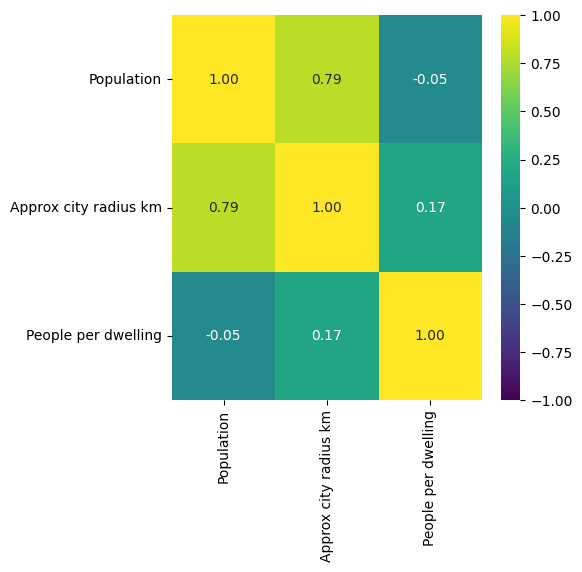

In [23]:
from seaborn import heatmap 

fig, ax = plt.subplots(figsize=(5, 5))  # Create a figure and axis with dimensions 6x6 inches

ax = heatmap(                           # Generate a heatmap to display the correlation matrix of features in X
    cov_mat,                            # Compute the correlation matrix for the DataFrame X
    fmt=".2f",                          # Format the annotation text to 2 decimal places
    annot=True,                         # Annotate each cell in the heatmap with its correlation value
    ax=ax,                              # Use the specified axis for the plot
    cmap="viridis",                     # Set the color palette to 'RdBu_r' (red to blue, reversed)
    vmin=-1,                            # Set the minimum value of the color scale to 0.5 (moderate correlation)
    vmax=1)                             # Set the maximum value of the color scale to 1 (strong positive correlation)

## Linear Regression

In [25]:
cita.columns = cita.columns.str.replace('Approx city radius km','City_Radius')

cita.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 1 to 17
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   City                              16 non-null     object 
 1   Country                           16 non-null     object 
 2   Population                        16 non-null     int64  
 3   Inland area in km2                16 non-null     object 
 4   Density in people per hectare     16 non-null     float64
 5   Dwellings                         16 non-null     int64  
 6   Density in dwellings per hectare  16 non-null     float64
 7   People per dwelling               16 non-null     float64
 8   City_Radius                       16 non-null     float64
 9   Main topographical constraint     16 non-null     object 
 10  Constraint                        16 non-null     object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.5+ KB


In [26]:
import statsmodels.formula.api as smf

results = smf.ols('Population ~ City_Radius', data = cita).fit()

results.params

Intercept     -1.797364e+06
City_Radius    4.762102e+05
dtype: float64

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     23.46
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           0.000260
Time:                        11:05:07   Log-Likelihood:                -252.37
No. Observations:                  16   AIC:                             508.7
Df Residuals:                      14   BIC:                             510.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.797e+06   1.24e+06     -1.453      0.168   -4.45e+06    8.56e+05
City_Radius  4.762e+05   9.83e+04      4.844      0.000    2.65e+05    6.87e+05
==============================================================================
Omnibus:                        9.560   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                6.136
Skew:                           1.374   Prob(JB):                       0.0465
Kurtosis:                       4.284   Cond. No.                         34.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    In this case the p-value is 0.000260. For a value of a = 0.05 we can reject the null hypothesis (H0: No linear relationship).

    There is strong evidence of a statistically significant relationship between City_Radius and Population.

    The 𝑅2 value of 0.626 indicates that approximately 62.6% of the variability in Population is explained by City_Radius.

    Conclusion: There is a significant linear relationship between City_Radius and Population, and the relationship is positive (as City_Radius increases, so does Population).

##  Spearman Correlation

    • H0: The correlation between the variables is zero, i.e. r = 0
    • Ha: The correlation between the variables is not zero i.e. r != 0

**Are the scores of two of the head judges related?** Since the scores provided are ordinal values between 0 and 10, it is not possible to use the Pearson correlation we described before. Instead, we need to use the ranks that the ordinal values provide.

| Singer   | A  | B  | C  | D  | E  | F  | G  | H  | I  | J  |
|:--------:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| Judge 1  | 2  | 10 | 7  | 8  | 5  | 7  | 5  | 8  | 6  | 4  |
| Judge 2  | 4  | 9  | 8  | 8  | 2  | 9  | 4  | 7  | 6  | 3  |


In [33]:
schwifty = pd.DataFrame({
'singer': ['A', 'B', 'C', 'D', 'E', 'F', 'G','H', 'I', 'J'],
'judge1': [2, 10, 7, 8, 5, 7, 5, 8, 6, 4],
'judge2': [4, 9, 8, 8, 2, 9, 4, 7, 6, 3]})

schwifty

,singer,judge1,judge2
0,A,2,4
1,B,10,9
2,C,7,8
3,D,8,8
4,E,5,2
5,F,7,9
6,G,5,4
7,H,8,7
8,I,6,6
9,J,4,3


In [34]:
# Calculate the Spearman rank-order correlation coefficient and p-value
r, p = stats.spearmanr(schwifty['judge1'], schwifty['judge2'])               # r: correlation coefficient, p: significance level

# Print the results in a formatted string
print(f"Spearman correlation coefficient (r) = {r:.4f}, p-value = {p:.4f}")  # Display r and p with 4 decimal precision

Spearman correlation coefficient (r) = 0.8148, p-value = 0.0041


##### Spearman Correlation Coefficient (r)

    r=0.8148: Indicates a strong positive monotonic relationship between judge1 and judge2 scores.
    This means that as one judge's ranking increases, the other judge's ranking tends to increase as well.

##### P-value (p):

    p=0.0041: This is much smaller than the typical significance level (α=0.05).

##### Conclusion: 

    The correlation is statistically significant, meaning the observed relationship is unlikely to be due to random chance.

# Hypothesis Testing with One Sample

A good example for
using hypothesis testing is when we want to check if the
estimated parameter from a population is significantly
different from a hypothesised population value. We call this
type of test a one-sample test.

**The Caprica City manufacturer is claiming that their toasters have resistor of 48W. This time we have a set of 12 measurements for the resistor:**

**data = [54.79, 59.62, 57.33, 48.57, 51.14, 25.78, 53.50,50.75, 43.34, 45.81, 43.88, 60.47]**

* H0 : mu = 48
* Ha : mu != 48

In [40]:
# Define the dataset
data = np.array([54.79, 59.62, 57.33, 48.57, 51.14, 25.78, 53.50, 50.75, 43.34, 45.81, 43.88, 60.47])

# Calculate the sample mean
xbar = np.mean(data)                              # Compute the arithmetic mean of the dataset

# Calculate the sample standard deviation
s = np.std(data, ddof=1)                          # Compute the unbiased standard deviation (n-1 in denominator)

# Print the results with meaningful labels
print(f"Sample Mean (x̄): {xbar:.2f}")             # Display the mean with 2 decimal places
print(f"Sample Standard Deviation (s): {s:.2f}")  # Display the standard deviation with 2 decimal places

Sample Mean (x̄): 49.58
Sample Standard Deviation (s): 9.43


In [41]:
from scipy.stats import t  # Import the t-distribution functions

# Define parameters
mu = 48                                   # Population mean (null hypothesis value)
n = len(data)                             # Sample size (number of observations)

# Calculate the t-statistic for a one-sample t-test
ts = (xbar - mu) / (s / np.sqrt(n))       # t-statistic: (sample mean - population mean) / standard error

# Calculate the two-tailed p-value
pval = 2 * t.sf(abs(ts), n - 1)           # Survival function (sf) gives the upper tail probability; double for two-tailed test

# Print the p-value with a descriptive label
print(f"Two-tailed p-value: {pval:.4f}")  # Display the p-value with 4 decimal precision

Two-tailed p-value: 0.5731


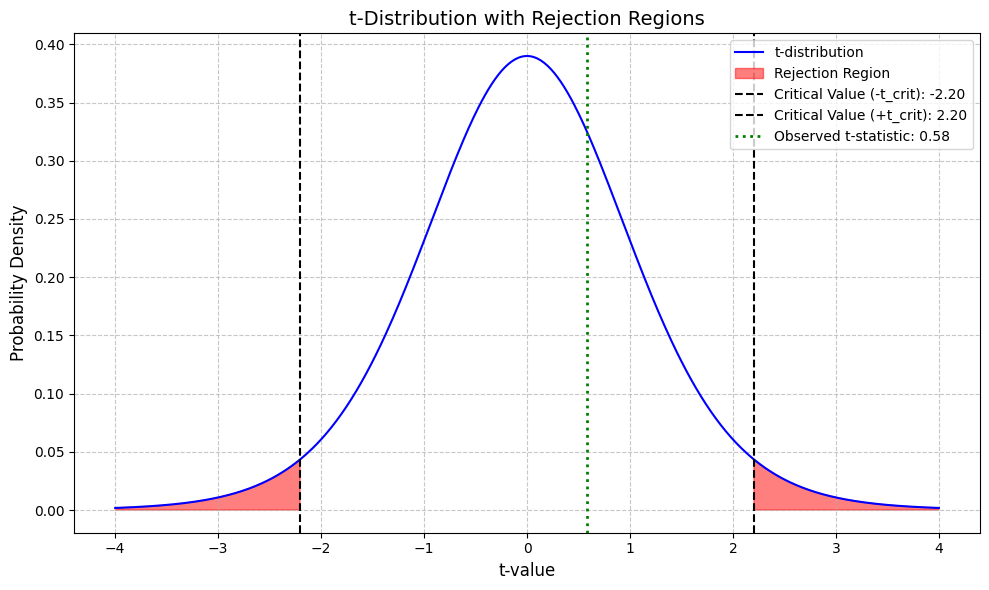

In [42]:
# Define parameters for the t-test
mu = 48                              # Population mean
n = len(data)                        # Sample size
ts = (xbar - mu) / (s / np.sqrt(n))  # t-statistic
alpha = 0.05                         # Significance level (two-tailed)
df = n - 1                           # Degrees of freedom

# Critical t-values for the rejection regions
t_crit = t.ppf(1 - alpha / 2, df)    # Upper critical value
x = np.linspace(-4, 4, 500)          # Range of t-values for the t-distribution

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, t.pdf(x, df), label="t-distribution", color='blue')  # t-distribution curve

# Shade the rejection regions
plt.fill_between(x, 0, t.pdf(x, df), where=(x < -t_crit) | (x > t_crit), color='red', alpha=0.5, label="Rejection Region")

# Add vertical dashed lines for critical values
plt.axvline(-t_crit, linestyle='--', color='black', linewidth=1.5, label=f"Critical Value (-t_crit): -{t_crit:.2f}")
plt.axvline(t_crit, linestyle='--', color='black', linewidth=1.5, label=f"Critical Value (+t_crit): {t_crit:.2f}")

# Add vertical line for the observed t-statistic
plt.axvline(ts, linestyle=':', color='green', linewidth=2, label=f"Observed t-statistic: {ts:.2f}")

# Add labels, legend, and title
plt.title("t-Distribution with Rejection Regions", fontsize=14)
plt.xlabel("t-value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend(fontsize=10)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [43]:
from scipy.stats import ttest_1samp

# Perform a one-sample t-test
t_stat, p_value = ttest_1samp(data, popmean=mu, alternative='two-sided')

# Print the t-statistic and p-value with descriptive labels
print(f"t-statistic: {t_stat:.4f}")  # Display the calculated t-statistic
print(f"    p-value: {p_value:.4f}")     # Display the two-tailed p-value

t-statistic: 0.5808
    p-value: 0.5731


     p-value (0.5731) > alpha (0.05), we can not reject the null hypothesis (H0: mu = 48)

In [45]:
# Automatic Response

def t_test(data, mu, alt='two-sided', alpha=0.05):
    
    stat, p =ttest_1samp(data, mu, alternative=alt)
    print('stat = {0:.4f}, p-value= {1:.4f}'.format(stat, p))
    print()
    
    if p > alpha:
        print("Can’t Reject the null hypothesis. There is no evidence to suggest that the mean is different from {0}.".format(mu))
    else:
        print("Reject the null hypothesis. The mean is different from {0}.".format(mu))

t_test(data, mu)

stat = 0.5808, p-value= 0.5731

Can’t Reject the null hypothesis. There is no evidence to suggest that the mean is different from 48.


## One-Sample z-test for Proportions

**A marketing team wants to evaluate the performance of a new advertising campaign. Historically, 36% of users click on ads on their platform. The team tested the new campaign on 100 users and observed that 40 users clicked on the ads. They want to determine if the click-through rate (CTR) for the new campaign is significantly different from the historical rate of 36%.**

    H0: p = 0.36
    Ha: p != 0.36

In [49]:
from statsmodels.stats.proportion import proportions_ztest

# Observed data
count = 40    # Number of users who clicked on the ad
nobs = 100    # Total number of users in the sample
value = 0.36  # Historical click-through rate (CTR)

# Perform the z-test for proportions
stat, pval = proportions_ztest(count=count, nobs=nobs, value=value)

# Print the results
print(f"Z-statistic: {stat:.4f}")  # Z-score for the test
print(f"    p-value: {pval:.4f}")      # Two-tailed p-value
print()

# Interpretation
alpha = 0.05                       # Significance level
if pval < alpha:
    print("Reject the null hypothesis: The new campaign has a significantly different CTR.")
else:
    print("Fail to reject the null hypothesis: The new campaign's CTR is not significantly different from 36%.")

Z-statistic: 0.8165
    p-value: 0.4142

Fail to reject the null hypothesis: The new campaign's CTR is not significantly different from 36%.


Z-statistic: 0.8165
p-value: 0.4142



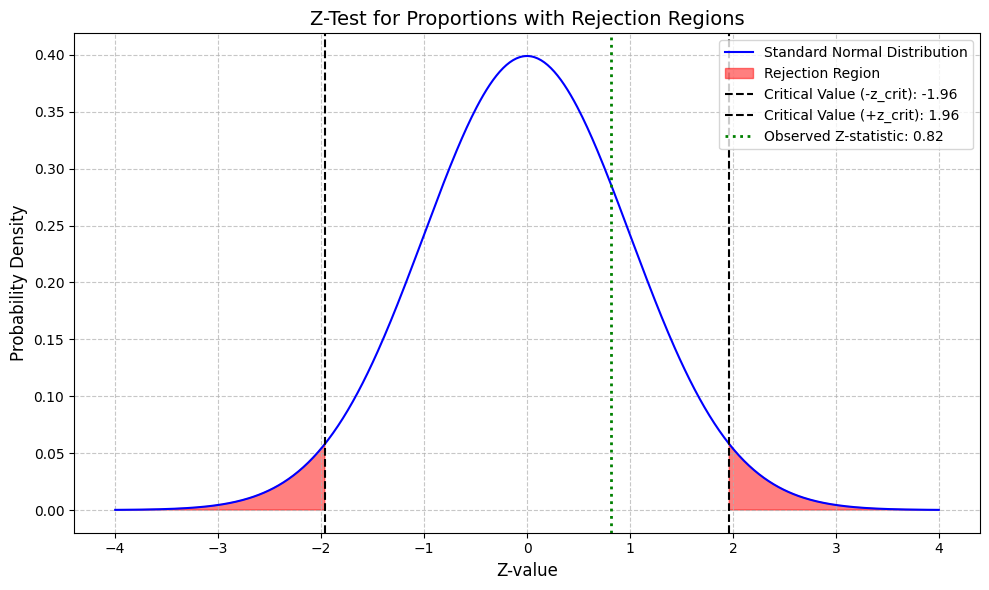

In [50]:
# Observed data
count = 40    # Number of successes (users who clicked the ad)
nobs = 100    # Total number of observations
value = 0.36  # Historical click-through rate (CTR)

# Perform the z-test for proportions
stat, pval = proportions_ztest(count=count, nobs=nobs, value=value)
print(f"Z-statistic: {stat:.4f}")  # Z-score for the test
print(f"p-value: {pval:.4f}\n")    # Two-tailed p-value

# Define parameters for the z-test
alpha = 0.05  # Significance level for a two-tailed test
z_crit = norm.ppf(1 - alpha / 2)   # Critical z-value for rejection regions
x = np.linspace(-4, 4, 500)        # Range of z-values for the normal distribution

# Plot the z-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x), label="Standard Normal Distribution", color='blue')  # z-distribution curve

# Shade the rejection regions
plt.fill_between(x, 0, norm.pdf(x), where=(x < -z_crit) | (x > z_crit), color='red', alpha=0.5, label="Rejection Region")

# Add vertical dashed lines for critical values
plt.axvline(-z_crit, linestyle='--', color='black', linewidth=1.5, label=f"Critical Value (-z_crit): -{z_crit:.2f}")
plt.axvline(z_crit, linestyle='--', color='black', linewidth=1.5, label=f"Critical Value (+z_crit): {z_crit:.2f}")

# Add vertical line for the observed z-statistic
plt.axvline(stat, linestyle=':', color='green', linewidth=2, label=f"Observed Z-statistic: {stat:.2f}")

# Add labels, legend, and title
plt.title("Z-Test for Proportions with Rejection Regions", fontsize=14)
plt.xlabel("Z-value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend(fontsize=10)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

**A factory produces light bulbs, and historical data suggests that 75% (𝑝0 = 0.75) of the bulbs pass quality control. The factory conducts a quality check on 256 randomly selected bulbs and finds that 131 of them passed the quality check (𝑝 = 131/256). The factory manager wants to determine if the passing rate has significantly deviated from the historical rate of 75%.**

In [52]:
# Define the hypothesized population proportion (null hypothesis)
p0 = 0.75                                            # Hypothesized proportion (e.g., 75%)

# Define the sample size
n = 256                                              # Total number of observations

# Calculate the sample proportion
p = 131 / n                                          # Observed proportion: successes divided by total observations

# Calculate the expected count of successes under the null hypothesis
count = n * p0                                       # Expected count under null hypothesis

# Calculate the z-score for the sample proportion

zscore = (p - p0) / np.sqrt((p0 * (1 - p0)) / n)     # Formula: (Observed proportion - Hypothesized proportion) / Standard error

# Print the calculated z-score with a descriptive label
print(f"Z-score: {zscore:.4f}")                      # Display the z-score

Z-score: -8.8046


Z-score: -8.8046


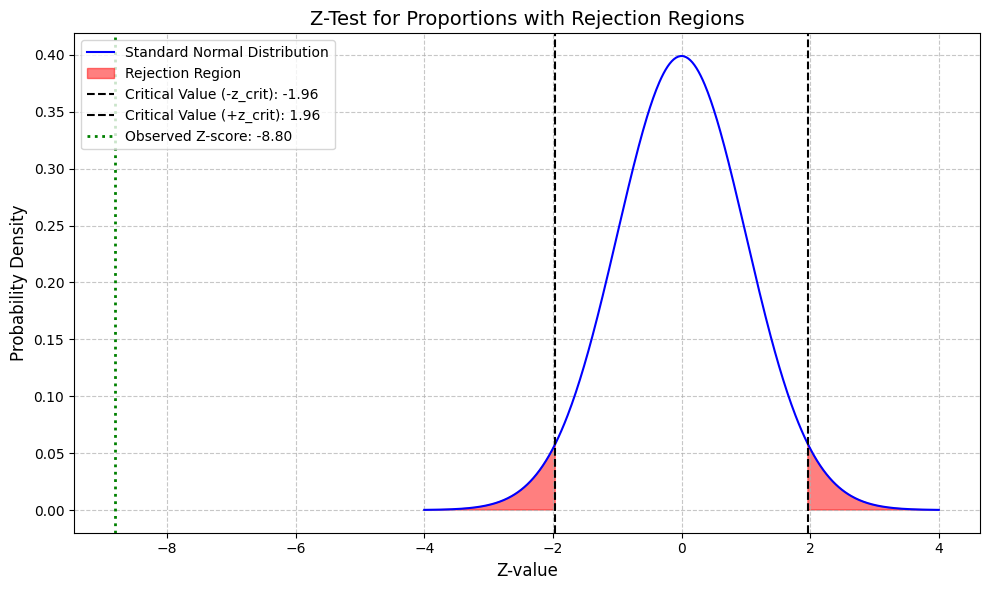

In [53]:
# Define the hypothesized population proportion
p0 = 0.75    # Hypothesized proportion (e.g., 75%)

# Define the sample size
n = 256      # Total number of observations

# Calculate the sample proportion
p = 131 / n  # Observed proportion: successes divided by total observations

# Calculate the z-score for the sample proportion
zscore = (p - p0) / np.sqrt((p0 * (1 - p0)) / n)  # Z-score formula

# Print the calculated z-score
print(f"Z-score: {zscore:.4f}")

# Define significance level and critical z-values
alpha = 0.05  # Significance level for a two-tailed test
z_crit = norm.ppf(1 - alpha / 2)  # Critical z-value for rejection regions
x = np.linspace(-4, 4, 500)       # Range of z-values for the standard normal distribution

# Plot the standard normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x), label="Standard Normal Distribution", color='blue')  # Normal distribution curve

# Shade the rejection regions
plt.fill_between(x, 0, norm.pdf(x), where=(x < -z_crit) | (x > z_crit), color='red', alpha=0.5, label="Rejection Region")

# Add vertical dashed lines for critical values
plt.axvline(-z_crit, linestyle='--', color='black', linewidth=1.5, label=f"Critical Value (-z_crit): -{z_crit:.2f}")
plt.axvline(z_crit, linestyle='--', color='black', linewidth=1.5, label=f"Critical Value (+z_crit): {z_crit:.2f}")

# Add vertical line for the observed z-score
plt.axvline(zscore, linestyle=':', color='green', linewidth=2, label=f"Observed Z-score: {zscore:.2f}")

# Add labels, legend, and title
plt.title("Z-Test for Proportions with Rejection Regions", fontsize=14)
plt.xlabel("Z-value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend(fontsize=10)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [54]:
# Calculate p-value for the two-tailed test
p_value = 2 * norm.sf(abs(zscore))  # Two-tailed p-value
print(f"P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05                        # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The passing rate has significantly changed.")        # Ha: p!= p0
else:
    print("Fail to reject the null hypothesis: The passing rate is consistent with 75%.")   # H0: p = p0

P-value: 0.0000
Reject the null hypothesis: The passing rate has significantly changed.


## Wilcoxon Signed Rank with One-Sample

The one-sample Wilcoxon test is a non-parametric alternative to the one-sample t-test. It is used to compare the median of a single sample to a known value when the data do not meet the normality assumption.

**Purpose:** Tests whether the population median differs significantly from a hypothesized value.

Assumptions:

    Data are paired or come from a single sample.
    The differences are symmetric about the median.

**When to Use:** When the data are not normally distributed, or the sample size is small.

Example: You want to test if the median weight of a sample differs from 50 kg. The one-sample Wilcoxon test can be used to assess this hypothesis without assuming normality.

In [57]:
from scipy.stats import wilcoxon

def wilcoxon1s(data, m0, alt='two-sided', alpha=0.05):
    
    stat, p = wilcoxon(data-m0, alternative=alt)
    print('stat ={0:.4f}, p-value= {1:.4f}'.format(stat, p))
    print()
    
    if p > alpha:
        print("Can’t reject the null hypothesis. There is no evidence to suggest that the median is different from {0}.".format(m0))
    else:
        print("Reject the null hypothesis.The median is different from {0}.".format(m0))

In [58]:
lieutenants=np.array([32.4, 55.2, 40.5, 47.9, 33.4, 34.3, 28.1, 43.0, 34.8, 60.2,
                        48.5, 52.2, 29.7, 29.9, 26.6, 44.4, 43.6, 50.4, 47.3, 34.2,
                        38.5, 61.0, 55.3, 45.2, 58.6])

wilcoxon1s(lieutenants, 41)

stat =132.0000, p-value= 0.4261

Can’t reject the null hypothesis. There is no evidence to suggest that the median is different from 41.


# Hypothesis Testing with Two Samples

### Two-Sample t-test – Comparing Means, Same Variances

    • H0 : m1 − m2 = c
    • Ha : m1 − m2 != c.

In [62]:
url1 = ('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

cars = pd.read_csv(url1)

cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [63]:
ct = cars.groupby(['am'])
ct['mpg'].mean()

am
0    17.147368
1    24.392308
Name: mpg, dtype: float64

In [64]:
automatic = cars[cars['am']==0][['mpg']]
manual = cars[cars['am']==1][['mpg']]

Let us check whether the data is normally distributed. We can use the Shapiro-Wilk function to test for normality

In [66]:
from scipy.stats import shapiro

def shapiro_test(data, alpha=0.05):
    
    stat, p = shapiro(data)
    print('stat = {0:.4f}, p-value= {1:.4f}'.format(stat, p))
    print()
    
    if p > alpha:
        print("Can’t Reject the null hypothesis. The data seems to be normally distributed.")
    else:
        print("Reject the null hypothesis. The data does not seem to be normally distributed.")

In [67]:
shapiro_test(automatic, alpha=0.05)

stat = 0.9768, p-value= 0.8987

Can’t Reject the null hypothesis. The data seems to be normally distributed.


In [68]:
shapiro_test(manual, alpha=0.05)

stat = 0.9458, p-value= 0.5363

Can’t Reject the null hypothesis. The data seems to be normally distributed.


### Hypotheses:

- **Null Hypothesis $( H_0 $)**:  
  The means of the two groups are equal $ \mu_{\text{automatic}} = \mu_{\text{manual}} $).

- **Alternative Hypothesis $( H_1 $)**:  
  The means of the two groups are not equal $( \mu_{\text{automatic}} \neq \mu_{\text{manual}} $).

In [70]:
import scipy.stats as sps

# Perform the two-sample t-test
tstat, p = sps.ttest_ind(automatic, manual, alternative='two-sided', equal_var=True)

# Ensure outputs are scalar
if isinstance(tstat, np.ndarray):
    tstat = tstat.item()
if isinstance(p, np.ndarray):
    p = p.item()

# Print the results
print(f"t-statistic = {tstat:.4f}, p-value = {p:.4f}")

t-statistic = -4.1061, p-value = 0.0003


    We have a p-value (0.0003) < alpha (0.05). For a 95% confidence level we reject the null hypothesis. 

In [72]:
import statsmodels.stats.weightstats as smw

# Another way

tstat, p, df = smw.ttest_ind(automatic, manual, alternative='two-sided', usevar='pooled')

# Ensure outputs are scalar
if isinstance(tstat, np.ndarray):
    tstat = tstat.item()
if isinstance(p, np.ndarray):
    p = p.item()
if isinstance(df, np.ndarray):
    df = df.item()

print('stat = {0:.4f}, p-value = {1:.4f}, df = {2}'.format(tstat, p, df))

stat = -4.1061, p-value = 0.0003, df = 30.0


## Levene’s Test – Testing Homoscedasticity

    Levene’s test checks whether two or more groups have equal variances.
    
           Null Hypothesis (𝐻0): The variances of the groups are equal.
    Alternative Hypothesis (𝐻1): At least one group has a different variance.

In [75]:
print(automatic.shape)  # Should output (n,)
print(manual.shape)     # Should output (m,)

(19, 1)
(13, 1)


Automatic and manual are pandas DataFrames, not NumPy arrays, so you need to extract their values as NumPy arrays first.

In [77]:
import scipy.stats as sps

# Convert DataFrame columns to NumPy arrays and flatten
automatic = automatic.values.ravel()  # Extract values and flatten
manual = manual.values.ravel()        # Extract values and flatten

# Perform Levene's test
tstat, p = sps.levene(automatic, manual)

# Print the results
print(f"Levene's Test Statistic = {tstat:.4f}, p-value = {p:.4f}")

Levene's Test Statistic = 4.1876, p-value = 0.0496


    We have a p-value (0.0496) < alpha (0.05). For a 95% confidence level we reject the null hypothesis. 
    In this case, At least one group has a different variance. 
    There is enough evidence to conclude that the variances of the two groups are not equal.

## Welch’s t-test – Comparing Means, Different Variances

Welch’s t-test is a statistical test used to compare the means of two independent groups. It is a variation of the standard independent t-test that **does not assume equal variances between the two groups**. This makes it more robust when the group variances or sample sizes are unequal.

#### When to Use:

    When the variances of the two groups are unequal.
    When the sample sizes of the groups are different.

### Hypotheses:

- **Null Hypothesis $( H_0 )$**:  
  $ \mu_1 = \mu_2 $  
  The means of the two groups are equal.

- **Alternative Hypothesis $( H_1 )$**:  
  $ \mu_1 \neq \mu_2 $  
  The means of the two groups are not
### Advantages of Welch’s t-test:

1. **No Assumption of Equal Variances**:  
   Unlike the standard t-test, Welch’s t-test does not assume the variances of the two groups are the same.

2. **Handles Unequal Sample Sizes**:  
   It adjusts for differences in sample sizes between groups.

3. **Robustness**:  
   Provides more reliable results when the assumptions of the standard t-test are iolated.
 equal.


In [81]:
import scipy.stats as sps

tstat, p = sps.ttest_ind(automatic, manual, alternative='two-sided', equal_var=False)
print('stat = {0:.4f}, p-value= {1:.4f}'.format(tstat, p))

stat = -3.7671, p-value= 0.0014


In [82]:
import statsmodels.stats.weightstats as smw

# Another way

tstat, p, df = smw.ttest_ind(automatic, manual, alternative='two-sided', usevar='unequal')
print('stat = {0:.4f}, p-value = {1:.4f}, df = {2:.4f}'.format(tstat, p, df))

stat = -3.7671, p-value = 0.0014, df = 18.3323


## Mann-Whitney Test – Testing Non-normal Samples

The **Mann-Whitney Test** (also called the U Test) is a **non-parametric test** used to compare two independent groups when the data are **not normally distributed**. It tests whether one group tends to have higher (or lower) values than the other.

#### Key Features:
- **Hypotheses**:
  - **Null Hypothesis $( H_0 )$**: The two groups have the same distribution.
  - **Alternative Hypothesis $( H_1 )$**: The distributions of the two groups differ.
  
- **Purpose**:  
  Determines if one group generally has larger values than the other, without assuming normality.

- **When to Use**:
  - Data do not meet normality assumptions.
  - Small sample sizes.
  - Comparing medians rather than means.

#### Example Use Case:
You want to compare the effectiveness of two treatments (e.g., drug A vs. drug B) on pain reduction, but the data are not normally distributed. The Mann-Whitney Test is an appropriate choice in this scenario.

**Two new pain killers: “Headezine” and “Kabezine”.**

| Headezine Volunteer | Rating | Kabezine Volunteer | Rating |
|:--------------------:|:------:|:------------------:|:------:|
|          1           |   4    |         1          |   8    |
|          2           |   2    |         2          |   7    |
|          3           |   6    |         3          |   5    |
|          4           |   2    |         4          |  10    |
|          5           |   3    |         5          |   6    |
|          6           |   5    |         6          |   9    |
|          7           |   7    |         7          |   8    |
|          8           |   8    |                    |        |

**We would like to know if there is a significant difference in Is there a difference in the perceived effectiveness of the treatments?**.

In [86]:
headezine = np.array([4, 2, 6, 2, 3, 5, 7, 8])
kabezine = np.array([8, 7, 5, 10, 6, 9, 8])

mhead = np.median(headezine)
mkabe = np.median(kabezine)

print(f'Headezine mean: {mhead:.2f}')
print(f' Kabezine mean: {mkabe:.2f}')

Headezine mean: 4.50
 Kabezine mean: 8.00


We can see that the medians are different, but we want to know if the difference is statistically significant. We can use
the Mann-Whitney test for this purpose:

In [88]:
from scipy.stats import mannwhitneyu 

U, p = mannwhitneyu(headezine, kabezine)
print('stat = {0:.4f}, p-value= {1:.4f}'.format(U, p))

stat = 8.5000, p-value= 0.0268


    With a p-value (0.0268) < alpha (0.05), we can reject the null hypothesis (the two groups have the same distribution) and conclude that the difference is statistically significant. 

Note that since we carried out a two-tailed test we can only strictly conclude that there is a difference in the
perceived effectiveness. If we wanted to assert that Kabezine is perceived to be more effective among the Starfleet
volunteers, **we can use a one-tailed test**. Here, our alternative hypothesis being that Kabezine has a lower median:

In [91]:
U, p = mannwhitneyu(headezine, kabezine, alternative='less')
print('stat = {0:.4f}, p-value= {1:.4f}'.format(U, p))

stat = 8.5000, p-value= 0.0134


    With a p-value (0.0134) < alpha (0.05), we can reject the null hypothesis and conclude that conclude that indeed Kabezine is perceived to be more effective, i.e., Kabezine mean > Headezine mean. 

## Paired Sample t-test

### When to Use:
- Data consists of **paired observations** (e.g., measurements before and after treatment on the same subjects).
- The differences between paired observations are approximately **normally distributed**.

### Hypotheses:
- **Null Hypothesis $( H_0 )$**:  
  $ \mu_d = 0 $  
  The mean difference between the paired observations is zero.

- **Alternative Hypothesis $( H_1 )$**:  
  - **Two-tailed**: $ \mu_d \neq 0 $  
  - **One-tailed**: $ \mu_d > 0 $ or $ \mu_d < 0 $

### Assumptions:
1. The differences between paired observations are **normally distributed**.
2. The data is measured on a **continuous scale** (e.g., height, weight, test scores).
 test scores).


**We are interested in the self-reported scores from volunteers taking “Kabezine” before and after
treatment. Since we have a pair of measurements for each subject, we should take this relationship into account.**

| Volunteer | Pre-Treatment | Post-Treatment | Difference |
|:---------:|:-------------:|:--------------:|:----------:|
|     1     |      6        |      7.3       |     1.3    |
|     2     |      7        |      8.3       |     1.3    |
|     3     |     5.4       |      5.7       |     0.3    |
|     4     |     7.3       |      8         |     0.7    |
|     5     |     6.8       |      5.3       |    −1.5    |
|     6     |      8        |      9.7       |     1.7    |
|     7     |     5.7       |      6.7       |     1.0    |
|     8     |      7        |      7.7       |     0.7    |
|     9     |     7.7       |      6.3       |    −1.3    |
|    10     |      6        |      6.7       |     0.7    |
|    11     |     4.7       |      5         |     0.3    |
|    12     |     4.1       |      5.1       |     1.0    |
|    13     |     5.2       |      6         |     0.8    |
|    14     |     6.3       |      8.8       |     2.5    |
|    15     |      6        |      6         |     0.0    |
|    16     |     6.7       |      8         |     1.3    |
|    17     |      4        |      6         |     2.0    |
|    18     |     7.3       |      8.3       |     1.0    |
|    19     |      5        |      6.4       |     1.4    |
|    20     |     5.7       |      5.7       |     0.0    |


In [97]:
# Define the pre and post data
pre = [6.0, 7.0, 5.4, 7.3, 6.8, 8.0, 5.7, 7.0, 7.7, 6.0, 4.7, 4.1, 5.2, 6.3, 6.0, 6.7, 4.0, 7.3, 5.0, 5.7]
post = [7.3, 8.3, 5.7, 8.0, 5.3, 9.7, 6.7, 7.7, 6.3, 6.7, 5.0, 5.1, 6.0, 8.8, 6.0, 8.0, 6.0, 8.3, 6.4, 5.7]

# Create the DataFrame
df = pd.DataFrame({
    'pre': pre,   # Add the pre column
    'post': post  # Add the post column
})

# Calculate the difference and add as a new column
df['difference'] = df['post'] - df['pre']

# Display the first few rows of the DataFrame
df.head()

,pre,post,difference
0,6.0,7.3,1.3
1,7.0,8.3,1.3
2,5.4,5.7,0.3
3,7.3,8.0,0.7
4,6.8,5.3,-1.5


In [98]:
df['difference'].describe()

count    20.000000
mean      0.755000
std       0.980588
min      -1.500000
25%       0.300000
50%       0.900000
75%       1.300000
max       2.500000
Name: difference, dtype: float64

Let us look at whether the data seems to be normally distributed. In this case we will use the Shapiro-Wilk test

In [100]:
shapiro_test(df['pre'])

stat = 0.9719, p-value= 0.7944

Can’t Reject the null hypothesis. The data seems to be normally distributed.


In [101]:
shapiro_test(df['post'])

stat = 0.9453, p-value= 0.3019

Can’t Reject the null hypothesis. The data seems to be normally distributed.


So far so good. We have that the mean of the differences is xd = 0.755 with a sample standard deviation equal to  0.9805. We can use this to build our test statistic. 

In [103]:
from scipy.stats import ttest_rel

tstat, p = ttest_rel(df['pre'], df['post'])     # The default for alternative is ’two-sided’
print('stat = {0:.4f}, p-value= {1:.4f}'.format(tstat, p))

stat = -3.4433, p-value= 0.0027


    With a p-value (0.0027) < alpha (0.05), we can reject the null hypothesis (he mean difference between the pre-treatment and post-treatment groups is zero), and conclude that there is strong evidence that, on average, Kabezine does offer improvements to the headaches. There is sufficient evidence to conclude that the means of the pre-treatment and post-treatment groups are significantly different.

## Wilcoxon Matched Pairs

### Wilcoxon Matched Pairs Test (Wilcoxon Signed-Rank Test)

The **Wilcoxon Matched Pairs Test** (also known as the **Wilcoxon Signed-Rank Test**) is a **non-parametric statistical test** used to compare two related samples. It tests whether the median difference between paired observations is significantly different from zero.

---

#### Key Features:
1. **Purpose**:  
   To determine if there is a significant difference between two related groups when the data do not meet the assumptions of normality required by the paired t-test.

2. **When to Use**:  
   - The data consists of **paired observations** (e.g., before-and-after measurements).
   - The differences between the pairs are **not normally distributed**.

3. **Hypotheses**:  
   - **Null Hypothesis $( H_0 )$**:  
     The median difference between the paired observations is zero $( \tilde{D} = 0 )$.
   - **Alternative Hypothesis $( H_1 )$**:  
     The median difference is not zero $( \tilde{D} \neq 0 )$.

---

#### How It Works:
1. Calculate the **differences** between the paired observations.
2. Rank the **absolute differences**, ignoring signs.
3. Assign positive or negative signs to the ranks based on the sign of the original difference.
4. Sum the ranks of the positive and negative differences.
5. Use the smaller of these sums to compute the test statistic $ W $.
6. Compare $ W $ to the critical value (or use a p-value) to decide whether to reject $ H_0 $.

---

#### Assumptions:
1. The paired data are **dependent**.
2. The differences are **symmetrically distributed** around the median.

---

#### Example Use Case:
You are measuring the effectiveness of a new teaching method. Students are tested **before** and **after** the method is implemented. If the scores are not normally distributed, the Wilcoxon Matched Pairs Test can determine whether the teaching method caused a significant change in scores.

---

#### Output and Interpretation:
- **Test Statistic $( W )$**:  
  Measures the strength of the difference.

- **p-value**:  
  If $ p < \alpha $ (e.g., $ \alpha = 0.05 $), reject $ H_0 $, indicating a significant difference.


| Volunteer | Pre-Treatment | Post-Treatment | Difference |
|:---------:|:-------------:|:--------------:|:----------:|
|     1     |     8.2       |      8.3       |     0.1    |
|     2     |     7.3       |      9.3       |     2.0    |
|     3     |     7.2       |      9.6       |     2.4    |
|     4     |     8.0       |      9.1       |     1.1    |
|     5     |     1.6       |      2.0       |     0.4    |
|     6     |     9.6       |      8.8       |    −0.8    |
|     7     |     4.0       |      9.9       |     5.9    |
|     8     |     4.7       |      4.0       |    −0.7    |
|     9     |     7.9       |      7.4       |    −0.5    |
|    10     |     2.9       |      3.5       |     0.6    |
|    11     |     5.0       |      8.5       |     3.5    |
|    12     |     2.0       |      5.8       |     3.8    |


In [108]:
# Pre-treatment and post-treatment data
cerritos_pre = [8.2, 7.3, 7.2, 8, 1.6, 9.6, 4, 4.7, 7.9, 2.9, 5, 2]  # Pre-treatment values
cerritos_post = [8.3, 9.3, 9.6, 9.1, 2, 8.8, 9.9, 4, 7.4, 3.6, 8.5, 5.8]  # Post-treatment values

# Create a DataFrame using a dictionary with proper key-value pairs
cerritos_df = pd.DataFrame({
    'pre': cerritos_pre,   # Pre-treatment column
    'post': cerritos_post  # Post-treatment column
})

# Calculate the difference between post-treatment and pre-treatment
cerritos_df['difference'] = cerritos_df['post'] - cerritos_df['pre']

# Calculate the median of the differences
cer_med = cerritos_df['difference'].median()

# Print the median of the differences
print(f"Median of differences: {round(cer_med,2)}")

Median of differences: 0.9


The null hypothesis is that the median of the differences is equal to 0. Let us test our hypothesis:

In [110]:
tstat, p = wilcoxon(cerritos_df['pre'], cerritos_df['post'])

print('stat = {0:.4f}, p-value= {1:.4f}'.format(tstat, p))

stat = 13.5000, p-value= 0.0425


    With a p-value (0.0425) < alpha (0.05), we can reject the null hypothesis (H0: Diff = 0). This indicates that there is a statistically significant difference between the pre-treatment and post-treatment values.